In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFECV, RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import  RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import label_binarize
from sklearn import metrics
import xgboost as xgb
import lightgbm as lgb

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pandas as pd

dbs = pd.read_excel('student_stress_dataset.xlxs.xlsx', sheet_name=0)

dbs.to_csv('student_stress_dataset.csv', index = False, header=True)

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gender           10 non-null     object
 1   age              10 non-null     int64 
 2   course           10 non-null     object
 3   sleep_duration   10 non-null     int64 
 4   study_hours      10 non-null     int64 
 5   social_activity  10 non-null     int64 
 6   stress_level     10 non-null     object
dtypes: int64(4), object(3)
memory usage: 692.0+ bytes
None

Số lượng giá trị null:
gender             0
age                0
course             0
sleep_duration     0
study_hours        0
social_activity    0
stress_level       0
dtype: int64


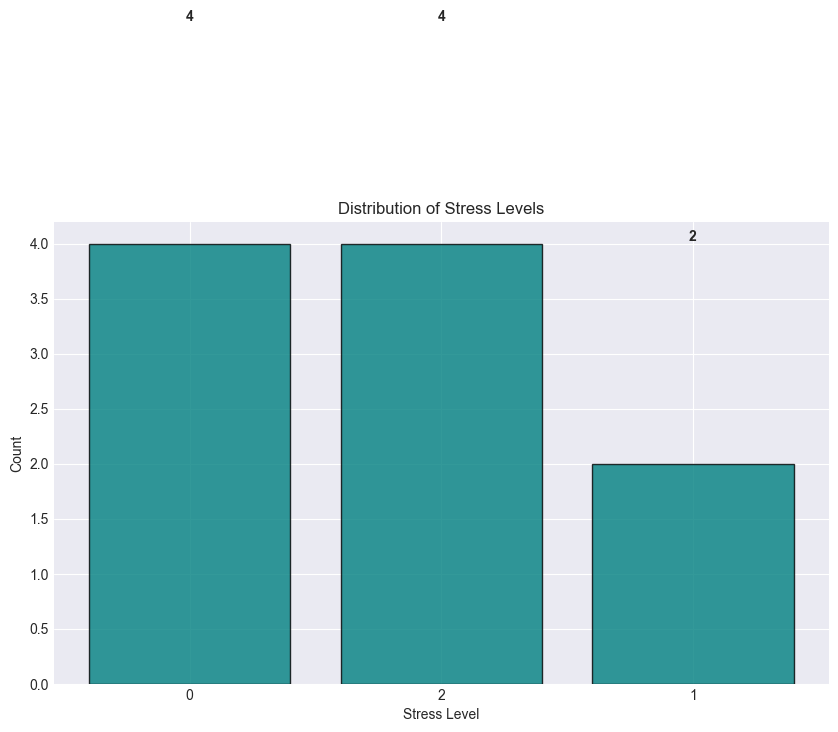

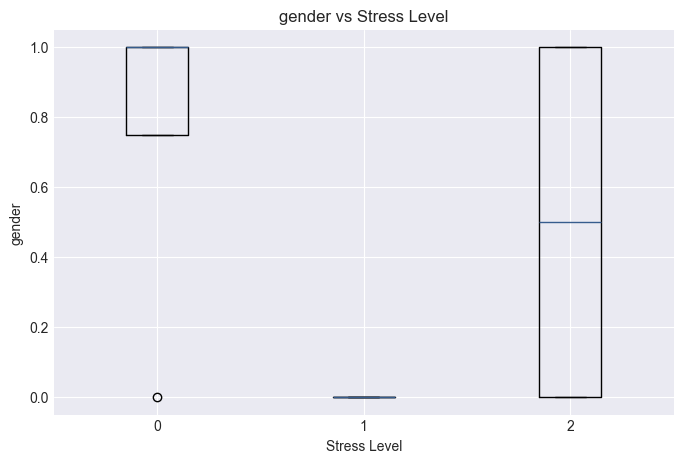

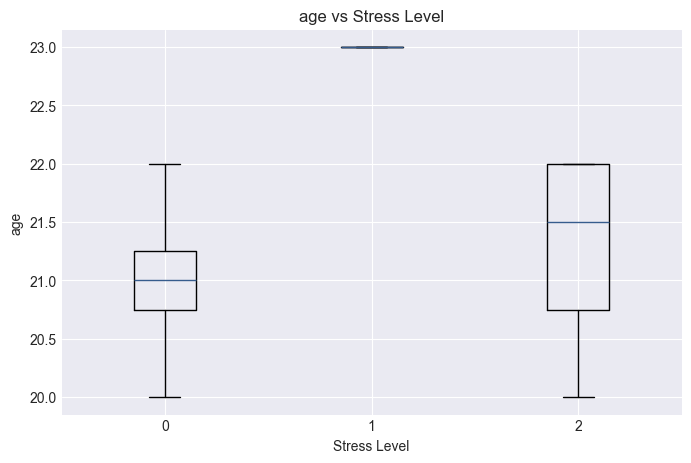

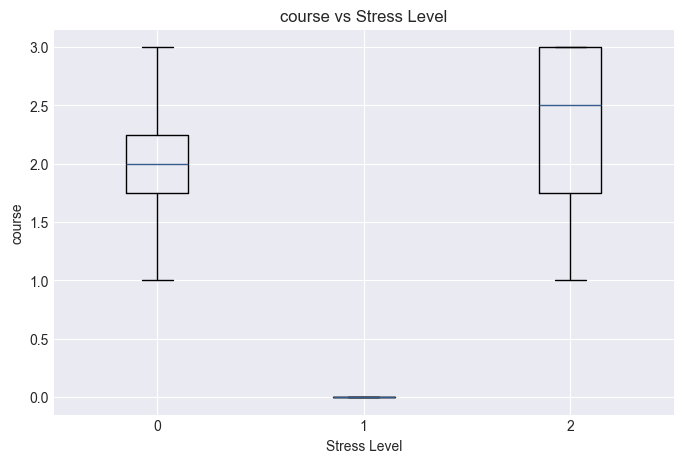

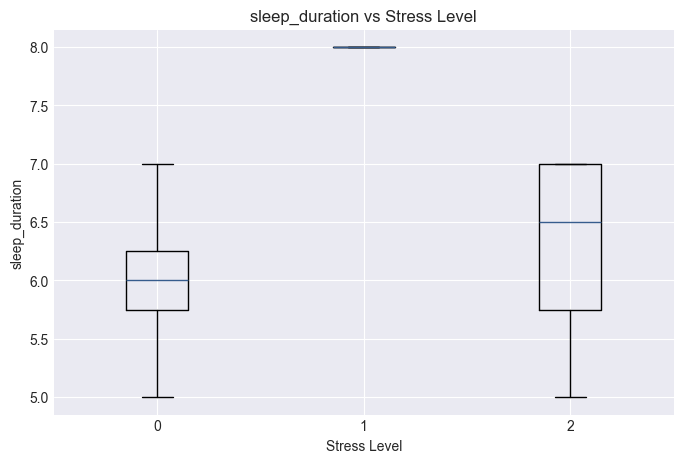

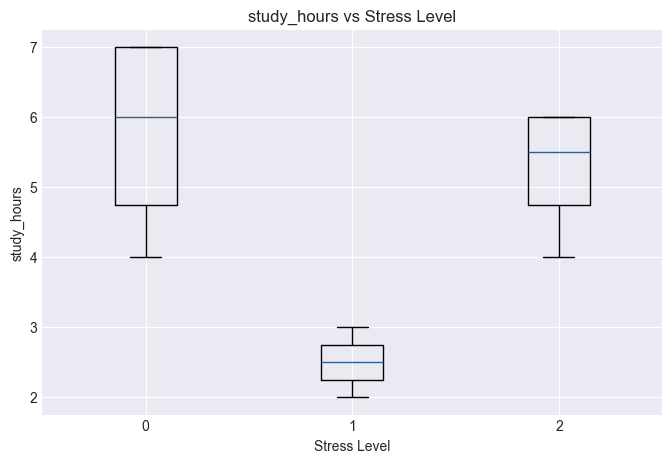

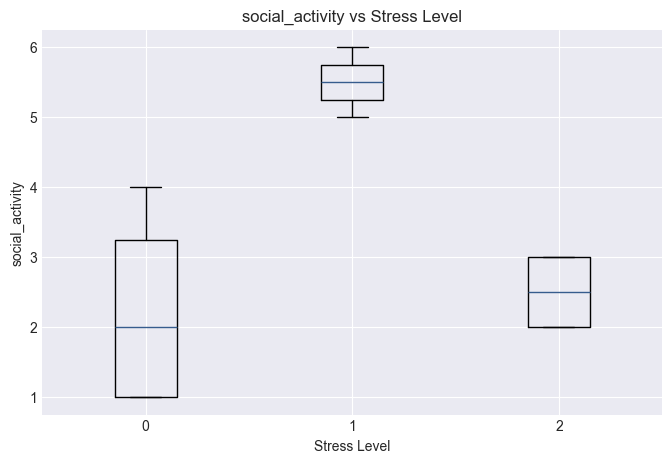

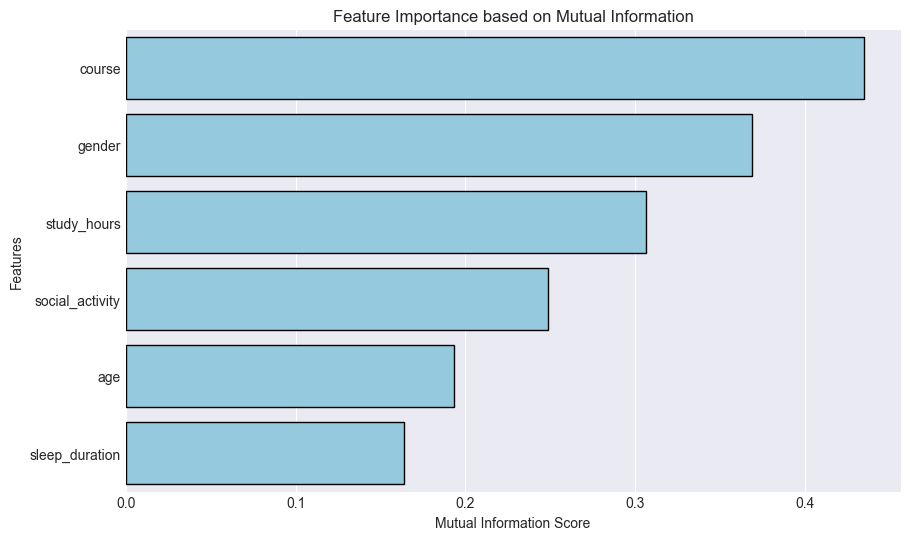


Kết quả ANOVA (top 10 feature):
                  p_value
social_activity  0.023815
course           0.037903
study_hours      0.041049
age              0.062268
sleep_duration   0.062268
gender           0.286974

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.33      0.33      0.33         3
weighted avg       0.33      0.33      0.33         3


Confusion Matrix:
[[0 0 1]
 [0 1 0]
 [1 0 0]]


In [15]:
# ==============================
# 1. IMPORT LIBRARIES
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import f_oneway

# ==============================
# 2. LOAD DATA
# ==============================
# Chọn 1 trong 2 tuỳ file bạn có
# df = pd.read_excel("student_stress_dataset.xlsx")
df = pd.read_csv("student_stress_dataset.csv")

# Đưa tất cả tên cột về lowercase (tránh lỗi Stress_Level vs stress_level)
df.columns = df.columns.str.lower()

# ==============================
# 3. DATA CLEANING
# ==============================
print("Thông tin dữ liệu:")
print(df.info())
print("\nSố lượng giá trị null:")
print(df.isnull().sum())

# Xử lý missing values: với numeric thì điền median, với object thì điền mode
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# ==============================
# 4. ENCODING
# ==============================
# Encode các biến dạng object
label_encoders = {}
for col in df.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# ==============================
# 5. FEATURE SCALING
# ==============================
scaler = StandardScaler()
X = df.drop("stress_level", axis=1)
y = df["stress_level"]

X_scaled = scaler.fit_transform(X)

# ==============================
# 6. TARGET VARIABLE ANALYSIS
# ==============================
plt.figure(figsize=(10, 6))
stress_counts = df["stress_level"].value_counts()

plt.bar(stress_counts.index.astype(str), stress_counts.values,
        edgecolor="black", color="teal", alpha=0.8)

for i, v in enumerate(stress_counts.values):
    plt.text(i, v + 2, str(v), ha="center", va="bottom", fontweight="bold")

plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.title("Distribution of Stress Levels")

plt.savefig("stress_level_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

# ==============================
# 7. BIVARIATE ANALYSIS
# ==============================
for feature in X.columns:
    plt.figure(figsize=(8, 5))
    data_to_plot = [
        df[df["stress_level"] == level][feature].values
        for level in sorted(df["stress_level"].unique())
    ]
    plt.boxplot(data_to_plot, labels=sorted(df["stress_level"].unique()))
    plt.xlabel("Stress Level")
    plt.ylabel(feature)
    plt.title(f"{feature} vs Stress Level")
    plt.savefig(f"bivariate_{feature}.png", dpi=300, bbox_inches="tight")
    plt.show()

# ==============================
# 8. FEATURE IMPORTANCE (Mutual Information)
# ==============================
mi_scores = mutual_info_classif(X_scaled, y, random_state=42)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=mi_series.values, y=mi_series.index, color="skyblue", edgecolor="black")
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.title("Feature Importance based on Mutual Information")
plt.savefig("feature_importance.png", dpi=300, bbox_inches="tight")
plt.show()

# ==============================
# 9. ANOVA TEST
# ==============================
anova_results = {}
for feature in X.columns:
    groups = [df[df["stress_level"] == level][feature]
              for level in df["stress_level"].unique()]
    f_stat, p_val = f_oneway(*groups)
    anova_results[feature] = p_val

anova_df = pd.DataFrame.from_dict(anova_results, orient="index", columns=["p_value"])
anova_df = anova_df.sort_values(by="p_value")
print("\nKết quả ANOVA (top 10 feature):")
print(anova_df.head(10))

# ==============================
# 10. SIMPLE MODELING
# ==============================
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=3, random_state=42, stratify=y)

model = LogisticRegression(max_iter=500, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
